In [114]:
import math

# Задача 1.
# Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

import numpy as np
import matplotlib.pyplot as plt


x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x, y

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [115]:
# I способ: с помощью математических формул

b = round((np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2), 2)
b

2.62

In [116]:
a = round(np.mean(y) - b * np.mean(x), 2)
a

444.23

In [117]:
y_pred = a + b * x
y_pred

array([535.93, 562.13, 942.03, 968.23, 549.03, 627.63, 585.71, 837.23,
       758.63, 732.43])

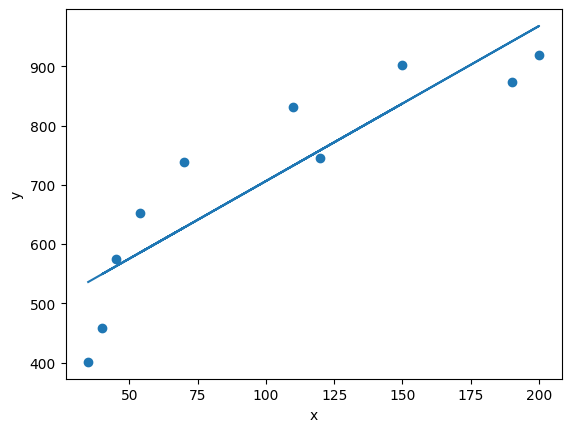

In [118]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pred)
plt.show()

In [119]:
# II способ: матричный метод без использования intercept

x = x.reshape((10, 1))
y = y.reshape((10, 1))

b = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
b

array([[5.88982042]])

In [120]:
y_pred = b * x
y_pred

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

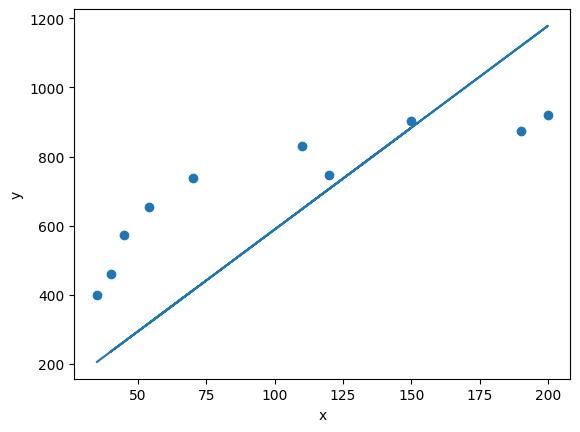

In [121]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pred)
plt.show()

In [193]:
# Задача 2.
# Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
b = 0.01

def mse(b, y = y, x = x, n = 10):
    return np.sum(b * x - y)**2 / n

n = 10
alpha = 10**(-6)

for i in range(3000):
    b -= alpha * (2 / n) * np.sum((b * x - y) * x)
    if i % 500 == 0:
        print(f'Iteration = {i}, b = {b}, mse = {mse(b)}')

Iteration = 0, b = 0.172007868, mse = 4794986.387563264
Iteration = 500, b = 5.889815520588435, mse = 126951.38725210636
Iteration = 1000, b = 5.8898204201284905, mse = 126950.26770845572
Iteration = 1500, b = 5.889820420132673, mse = 126950.26770750014
Iteration = 2000, b = 5.889820420132673, mse = 126950.26770750014
Iteration = 2500, b = 5.889820420132673, mse = 126950.26770750014


In [194]:
y_pred = 5.88982 * x
y_pred

array([ 206.1437 ,  265.0419 , 1119.0658 , 1177.964  ,  235.5928 ,
        412.2874 ,  318.05028,  883.473  ,  706.7784 ,  647.8802 ])

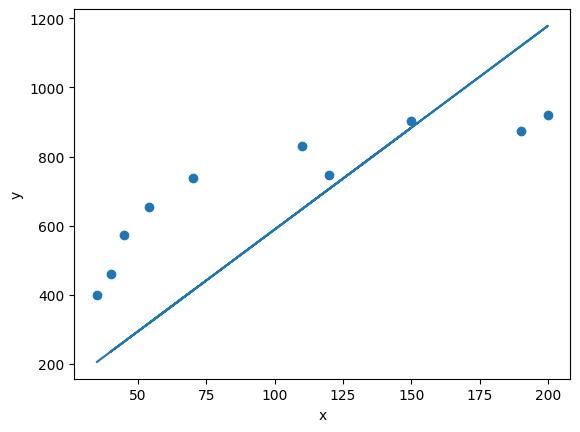

In [195]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pred)
plt.show()

In [225]:
# Задача 3.
# Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом
# шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

a = 10
b = 0.1
mse = []
alpha = 0.00001

for i in range(4000000):
    y_pred = a + b * x
    res = y - y_pred
    mse.append(np.sum(res**2))
    a -= alpha * ((2 / n) * np.sum(res) * -1)
    b -= alpha * ((2 / n) * res.dot(x) * -1)
    if i % 100000 == 0:
        print(f'Iteration = {i}, a = {a}, b = {b}')

Iteration = 0, a = 10.0137952, b = 1.6750008000000003
Iteration = 100000, a = 182.77848008946535, b = 4.544550189933986
Iteration = 200000, a = 286.7846689753841, b = 3.779018655956062
Iteration = 300000, a = 349.4085556838824, b = 3.3180791621707355
Iteration = 400000, a = 387.11545782583266, b = 3.0405396912268987
Iteration = 500000, a = 409.81942182220274, b = 2.873428478214517
Iteration = 600000, a = 423.48986282550374, b = 2.772807988381065
Iteration = 700000, a = 431.721066735731, b = 2.712222688377495
Iteration = 800000, a = 436.6772139291838, b = 2.6757432537951362
Iteration = 900000, a = 439.66139404075113, b = 2.6537783687921834
Iteration = 1000000, a = 441.4582193953459, b = 2.6405529397602425
Iteration = 1100000, a = 442.5401183539216, b = 2.6325896850901187
Iteration = 1200000, a = 443.1915480287961, b = 2.6277948746694393
Iteration = 1300000, a = 443.58378486196455, b = 2.6249078381594537
Iteration = 1400000, a = 443.8199572981051, b = 2.623169504611627
Iteration = 150000

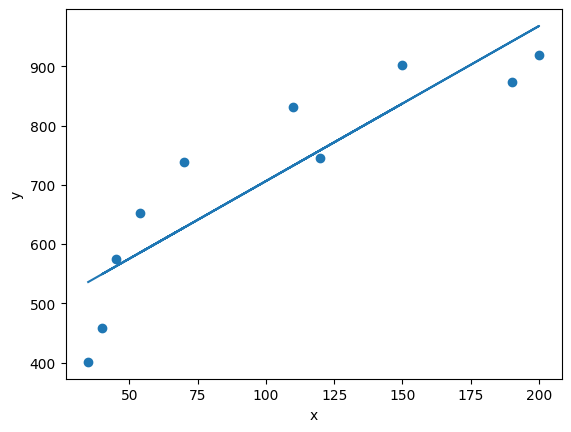

In [226]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pred)
plt.show()

In [227]:
'y_pred = 444.18 + 2.62x'

'y_pred = 444.18 + 2.62x'